In [1]:
#load module
from urllib.request import urlretrieve

#set URL
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

#download data from URL and call it Freemont.csv
urlretrieve(URL, 'Freemont.csv')


('Freemont.csv', <http.client.HTTPMessage at 0x1f8e724fcc0>)

In [5]:
import pandas as pd
data = pd.read_csv('Freemont.csv', index_col = 'Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


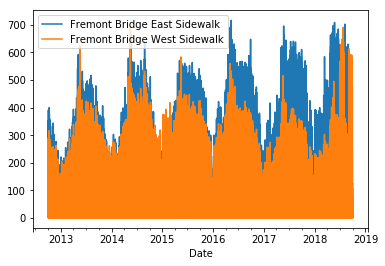

In [6]:
%matplotlib inline
data.plot()

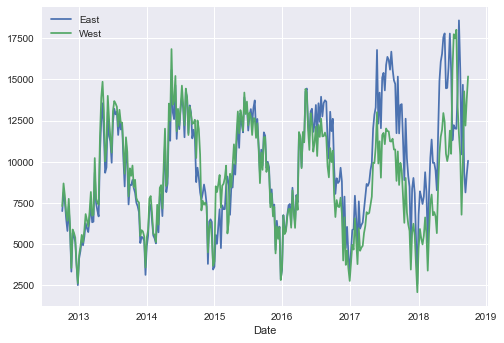

In [12]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ['East', 'West']
data.resample('W').sum().plot() #plot weekly

(0, 618365.35)

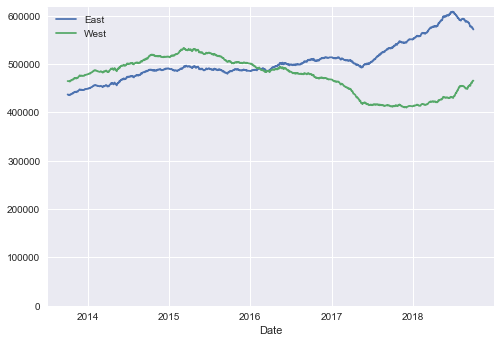

In [14]:
ax = data.resample('D').sum().rolling(365).sum().plot()
#ax.set_ylim(0, None)

                      East   West  Total
Date                                    
2012-10-03 00:00:00    9.0    4.0   13.0
2012-10-03 01:00:00    6.0    4.0   10.0
2012-10-03 02:00:00    1.0    1.0    2.0
2012-10-03 03:00:00    3.0    2.0    5.0
2012-10-03 04:00:00    1.0    6.0    7.0
2012-10-03 05:00:00   10.0   21.0   31.0
2012-10-03 06:00:00   50.0  105.0  155.0
2012-10-03 07:00:00   95.0  257.0  352.0
2012-10-03 08:00:00  146.0  291.0  437.0
2012-10-03 09:00:00  104.0  172.0  276.0
2012-10-03 10:00:00   46.0   72.0  118.0
2012-10-03 11:00:00   32.0   10.0   42.0
2012-10-03 12:00:00   41.0   35.0   76.0
2012-10-03 13:00:00   48.0   42.0   90.0
2012-10-03 14:00:00   51.0   77.0  128.0
2012-10-03 15:00:00   92.0   72.0  164.0
2012-10-03 16:00:00  182.0  133.0  315.0
2012-10-03 17:00:00  391.0  192.0  583.0
2012-10-03 18:00:00  258.0  122.0  380.0
2012-10-03 19:00:00   69.0   59.0  128.0
2012-10-03 20:00:00   51.0   29.0   80.0
2012-10-03 21:00:00   38.0   25.0   63.0
2012-10-03 22:00

(0, 1080850.45)

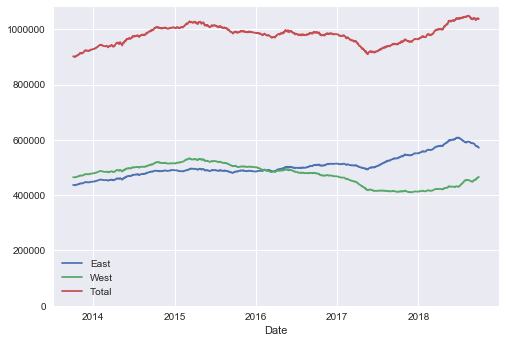

In [26]:
data['Total'] = data['West'] + data['East']
print(data)
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

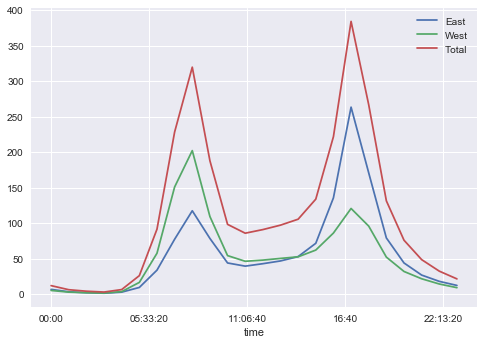

In [18]:
data.groupby(data.index.time).mean().plot()

In [37]:
#east_side_walk = data['East']
#print(east_side_walk)
pivoted = data.pivot_table('East', index = data.index.time, columns = data.index.date) #pivot table for east sidewalk
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,9.0,11.0,7.0,7.0,5.0
01:00:00,6.0,0.0,4.0,5.0,5.0
02:00:00,1.0,6.0,3.0,2.0,1.0
03:00:00,3.0,3.0,2.0,2.0,2.0
04:00:00,1.0,1.0,2.0,1.0,2.0


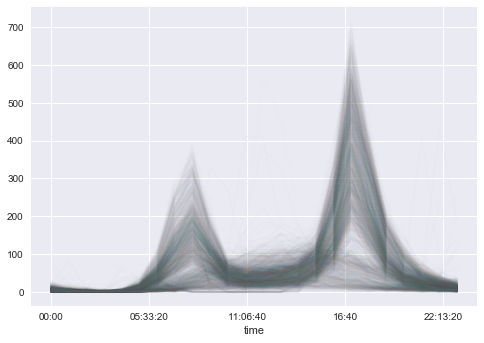

In [36]:
pivoted.plot(legend=False, alpha=0.01)